In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [3]:
def standardization(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)

In [4]:
X_st = standardization(X)

In [5]:
X_st

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# Найдем собственные векторы и собственные значения (англ. Eigenvalues)

covariance_matrix = X_st.T.dot(X_st)

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения в порядке убывания:
(437.77467247979894, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021055, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.01353133569725, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929513, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [7]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперя оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.85076178670177, 3.668921889282877, 0.5178709107154922]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [8]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [9]:
# Сформируем новую матрицу "объекты-признаки"
Z = X_st.dot(W)

In [10]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

**Используем  PCA**

In [11]:
from sklearn.decomposition import PCA
# для 2 компонент
pca = PCA(n_components = 2)
XPCAreduced_2 = pca.fit_transform(Z)

In [12]:
XPCAreduced_2[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

In [13]:
# для 4 компонент
pca = PCA(n_components = 4)
XPCAreduced_4= pca.fit_transform(X_st)
XPCAreduced_4[:10]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281],
       [-2.07563095,  1.48917752,  0.02696829, -0.00660818],
       [-2.44402884,  0.0476442 ,  0.3354704 ,  0.03677556],
       [-2.23284716,  0.22314807, -0.0886955 ,  0.0246121 ],
       [-2.33464048, -1.11532768,  0.14507686,  0.02685922],
       [-2.18432817, -0.46901356, -0.25376557,  0.03989929]])

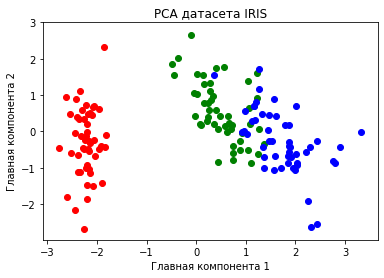

In [14]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

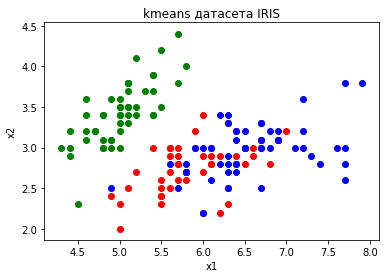

In [16]:
# y - train  датасета Iris

plt.figure()
y = iris.target
y[y==1]=3   # Пришлось переставить лейблы ((, поменять 1 и 0 местами
y[y==0]=1
y[y==3]=0
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y==i, 0], X[y==i, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('kmeans датасета IRIS')
plt.show()

**Используем  KMeans**

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

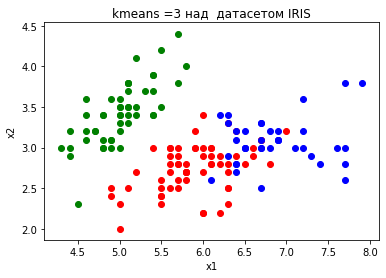

In [19]:
## K-means без применения PCA

plt.figure()
y_ = kmeans.labels_
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y_==i, 0], X[y_==i, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('kmeans =3 над  датасетом IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

In [20]:
## K-means c применения PCA
kmeans_PCA = KMeans(n_clusters=3, random_state=42).fit(Z)
kmeans_PCA.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

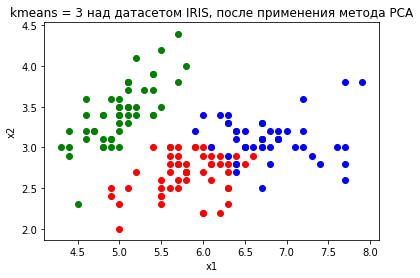

In [21]:
plt.figure()
y_PCA = kmeans_PCA.labels_
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y_PCA==i, 0], X[y_PCA==i, 1], c=c)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('kmeans = 3 над датасетом IRIS, поcле применения метода PCA')
plt.show()

In [22]:
from sklearn import metrics

# Точность при применении PCA
score = metrics.accuracy_score(y,y_PCA)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.833333


In [23]:
# Точность при применении Kmeans без PCA
score = metrics.accuracy_score(y,y_)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.893333


In [24]:
# Точность в сравнении Kmeans с PCA и без 
score = metrics.accuracy_score(y_,y_PCA)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.926667
